In [3]:
## Goal: Explore data w/ visualizations for Player Stats dataset 

# Import Python pkgs pandas, numpy, matplotlib.pyplot, & seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math

%matplotlib inline  
# Start of magic command which configures execution environment, to display graphics w/in notebook

In [4]:
# Load already prepared dataset, display shape, & explore first 10 rows of Pandas data frame

Pstats = pd.read_csv('Raptors2020PlayerStatsR.csv', header=0)
print(Pstats.shape)
Pstats.head(5)

(195, 53)


,Player,Game,Unit_Position,Position_Group,Position,Result,Games_Played,Minutes_Played,Meters,Involvements,...,Scrum_Involvement,Scrum_Attended,Scrum_Retained,AtkScrumPct,Lineout_Involvement,Lineout_Attended,Lineout_Retained,LineoutPct,Lineout_Stolen,Lineout_Disrupted
0,Aladdin Schirmer,1.0,Forward,Back Row,Flanker,Loss,1.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ata Malifa,1.0,Back,Flyhalf,Flyhalf,Loss,1.0,24.0,3420.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Blake Rogers,1.0,Forward,Front Row,Prop,Loss,1.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Blank,1.0,NaN,NaN,NaN,Loss,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brendan Daly,1.0,Forward,Second Row,Lock,Loss,1.0,70.0,5708.0,50.0,...,11.0,6,5,0.83,15.0,16,13,0.81,NaN,NaN


In [5]:
Pstats.dtypes

Player                    object
Game                     float64
Unit_Position             object
Position_Group            object
Position                  object
Result                    object
Games_Played             float64
Minutes_Played           float64
Meters                   float64
Involvements             float64
Involve-Min              float64
Meter-Involve            float64
Positive Involvements    float64
PosInvolv-Min            float64
PosInvolvPct             float64
Negative_Involvements    float64
Live_Reload              float64
Dead_Reload              float64
Pass                     float64
Tips_Pass                float64
Axe_Ball                 float64
Offload                  float64
Try_Assist               float64
Carry                    float64
Gainline_Carry           float64
Linebreak                float64
Defender_Beaten          float64
Tackle                   float64
Positive_Tackle          float64
Neutral_Tackle           float64
Negative_T

In [6]:
# Compute & display frequency table for categorical variables w/pandas value_counts

def count_unique(Pstats, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(Pstats[col].value_counts())
        
cat_cols = ['Player', 'Unit_Position','Position_Group', 'Position', 'Result', 'Jackal', 'Conversion_Made', 'Penalty_Made',
            'Scrum_Attended', 'Scrum_Retained', 'AtkScrumPct', 'Lineout_Attended', 'Lineout_Retained', 'LineoutPct',
            'Lineout_Stolen', 'Lineout_Disrupted']
count_unique(Pstats, cat_cols)


For column Player
Xendy Tatibouet       5
John Ryberg           5
Marco Fepuleai        5
Sean Yacoubian        5
Blank 2               5
Michael Stewart       5
Chad London           5
Digby Ioane           5
Mika Kruse            5
Robert Petzer         5
Sakaria Taulafo       5
Tomas Quinlan         5
Blake Rogers          5
Team Average          5
Carlo DeNysschen      5
Michael Curry         5
Jacob Finau           5
Kelepi Fifita         5
Aladdin Schirmer      5
Blank                 5
Team Count            5
Nick Johnson          5
Sam Slade             5
Connor Cook           5
Rene Ranger           5
Ryan James            5
Chad Gough            5
Brendan Daly          5
Luke White            5
Blank 3               5
Nicklas Boyer         5
Campbell Johnstone    5
Mason Emerson         5
Seth Halliman         5
Blank 1               5
Mateo Gadsden         5
Ata Malifa            5
Team Total            5
Dakota Oneil          5
Name: Player, dtype: int64

For column Unit_P

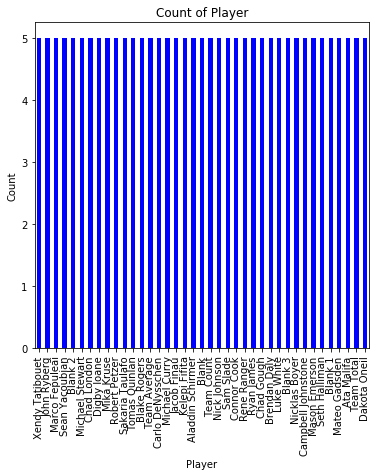

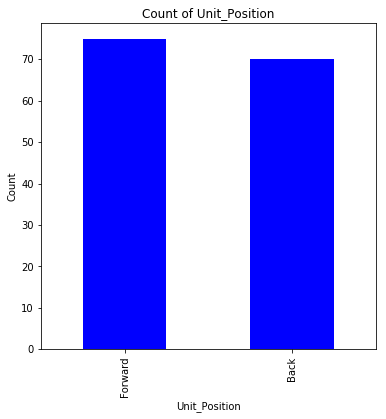

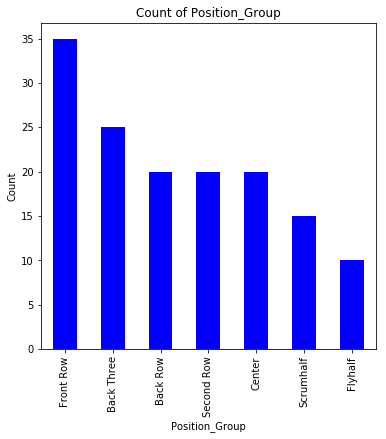

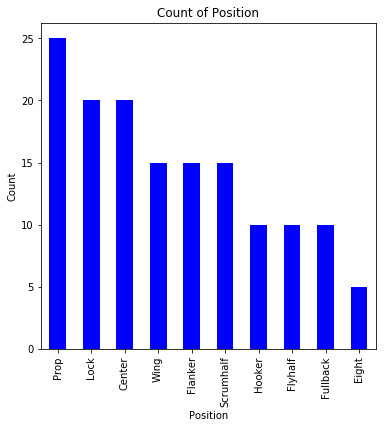

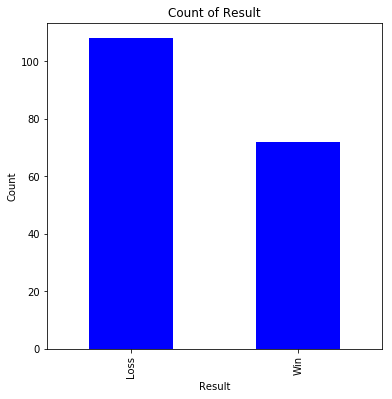

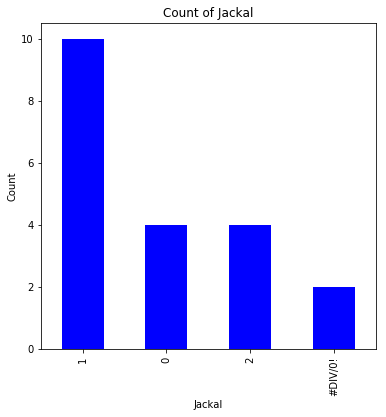

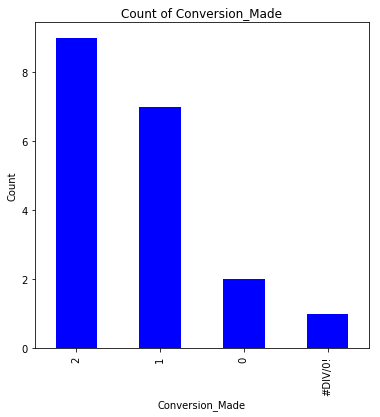

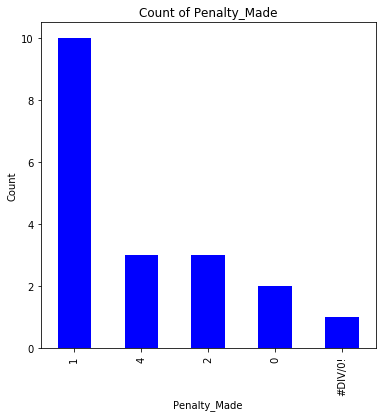

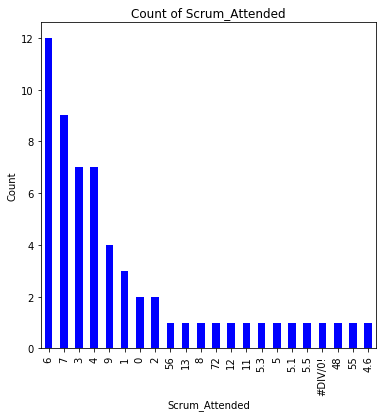

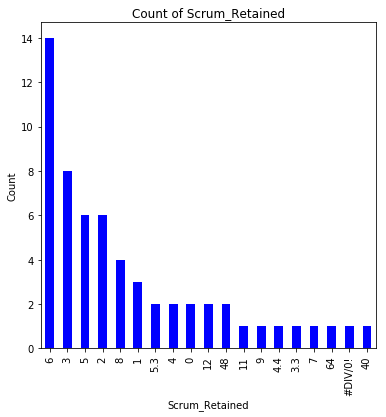

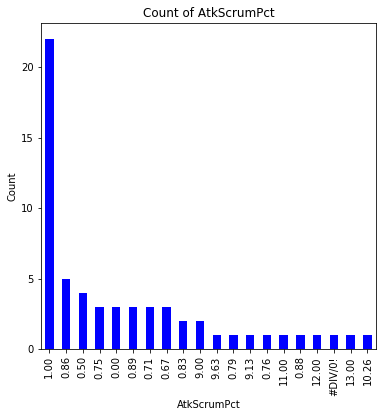

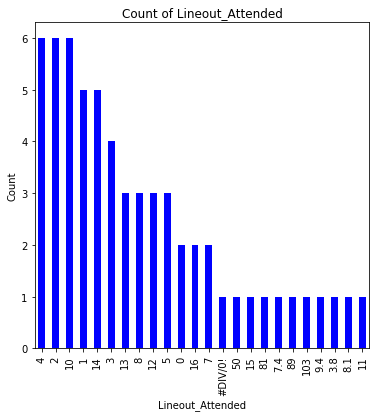

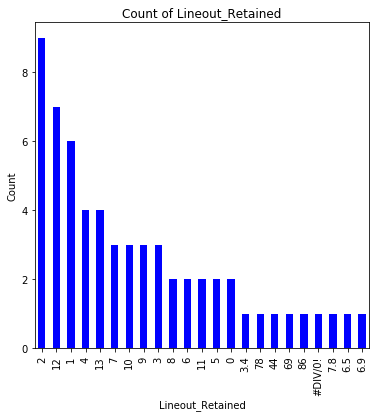

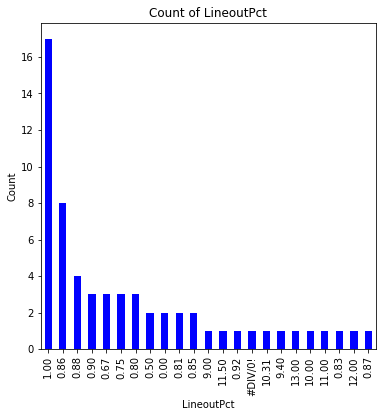

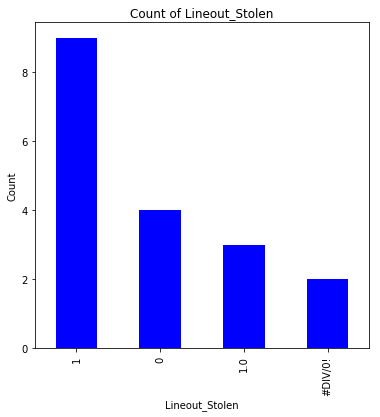

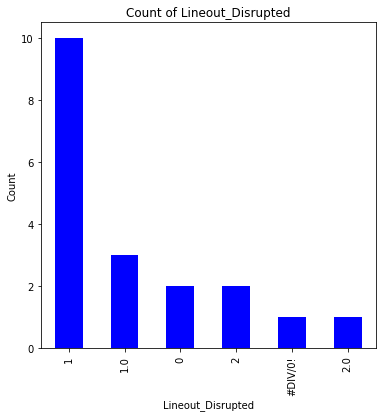

In [7]:
## Visualize distributions w/ 1 Dimensional Plots
# Step 1- Visualize frequency distributions of categorical variables w/ pandas Bar Chart plot.bar

def plot_bars(Pstats, cols):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        counts = Pstats[col].value_counts()    # Find counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue')    # Use plot.bar method from pandas on counts data frame
        ax.set_title('Count of ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Count')   # Set y-axis label w/ matplotlib
        plt.show()
        
cat_cols = ['Player', 'Unit_Position','Position_Group', 'Position', 'Result', 'Jackal', 'Conversion_Made', 'Penalty_Made',
            'Scrum_Attended', 'Scrum_Retained', 'AtkScrumPct', 'Lineout_Attended', 'Lineout_Retained', 'LineoutPct',
            'Lineout_Stolen', 'Lineout_Disrupted']

plot_bars(Pstats, cat_cols)

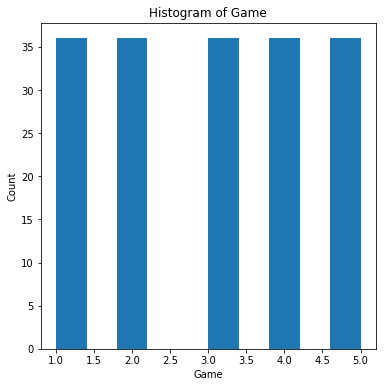

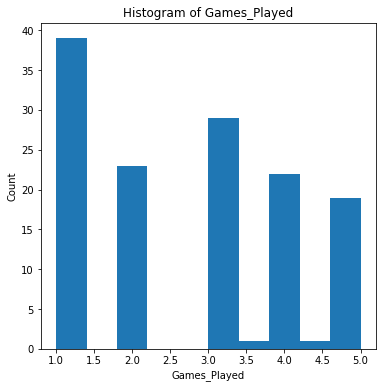

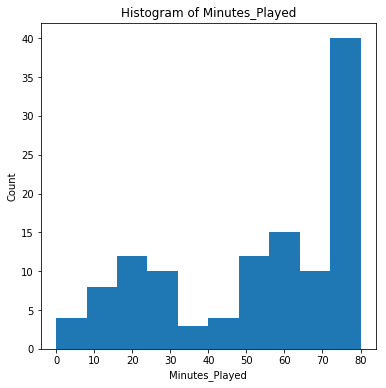

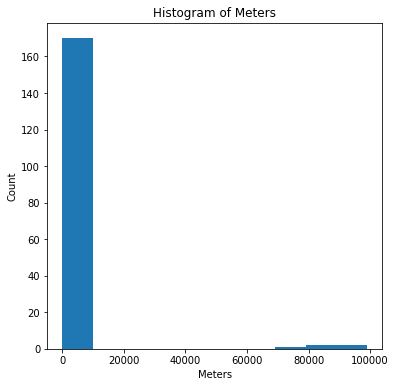

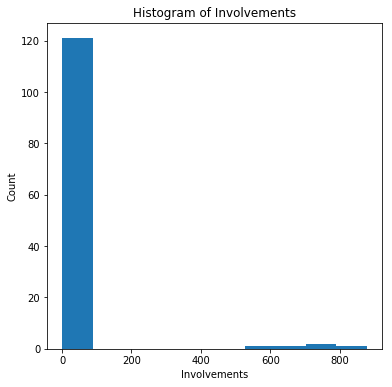

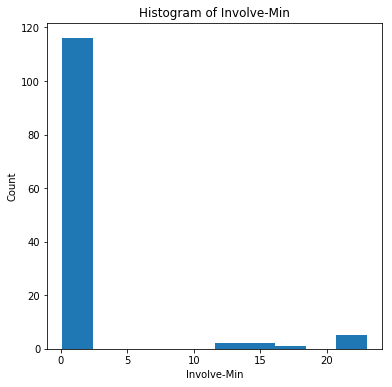

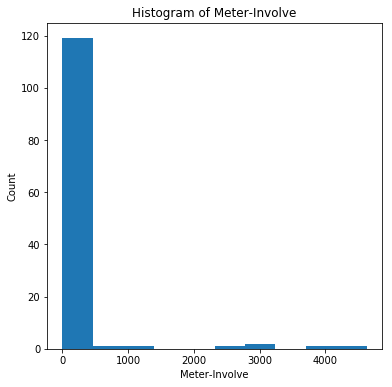

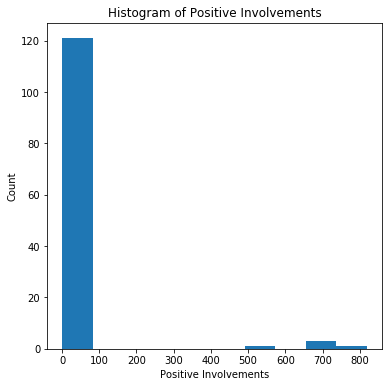

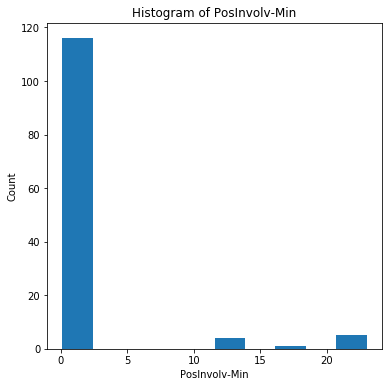

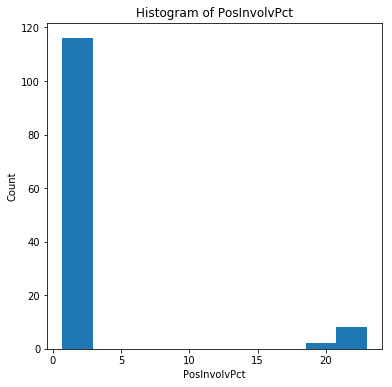

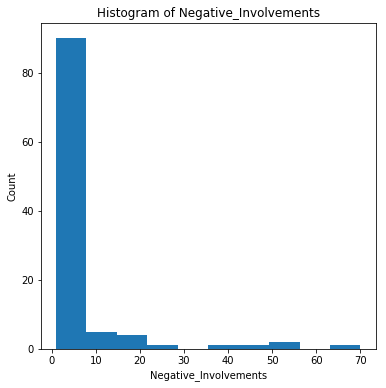

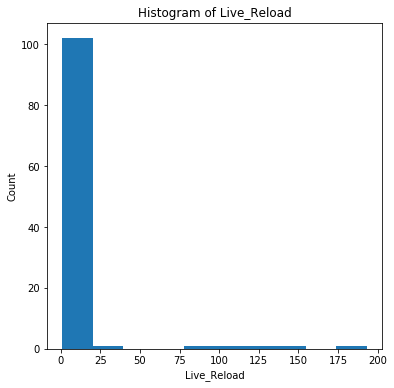

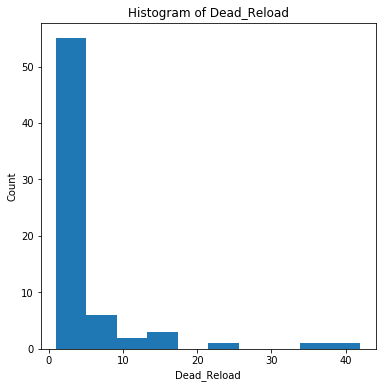

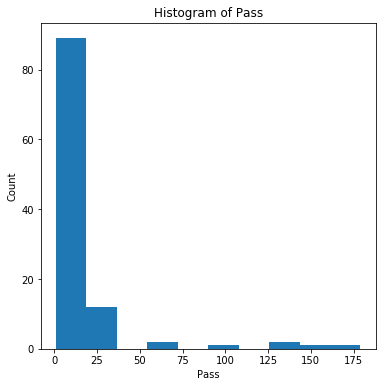

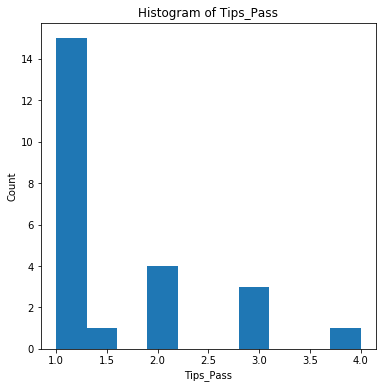

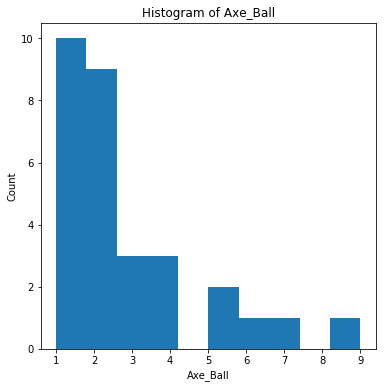

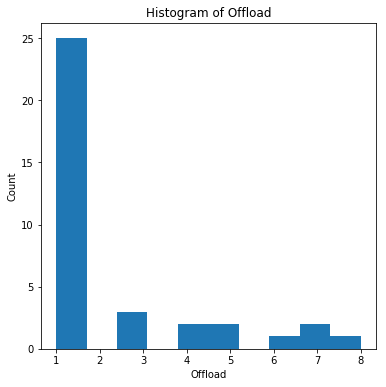

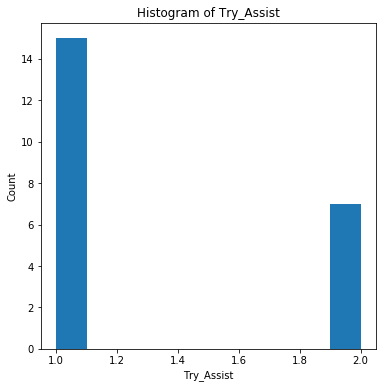

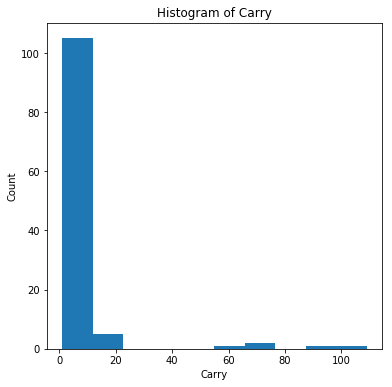

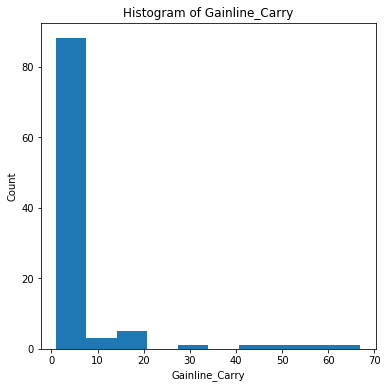

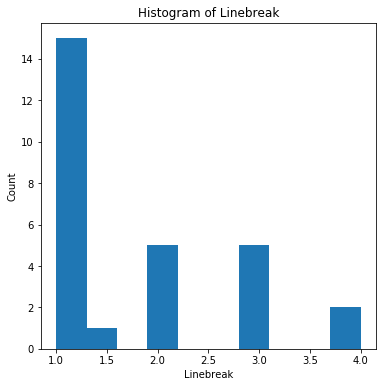

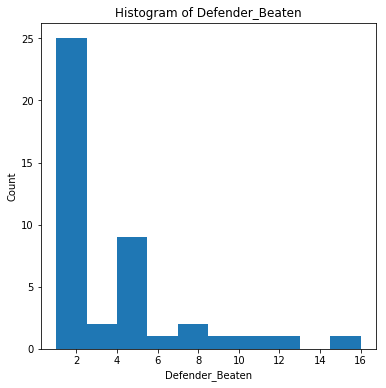

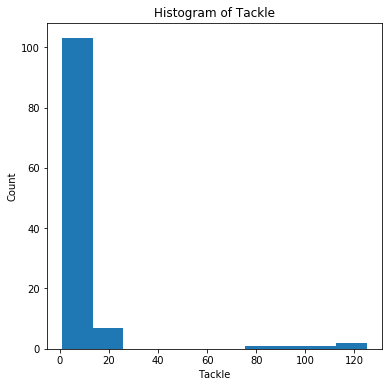

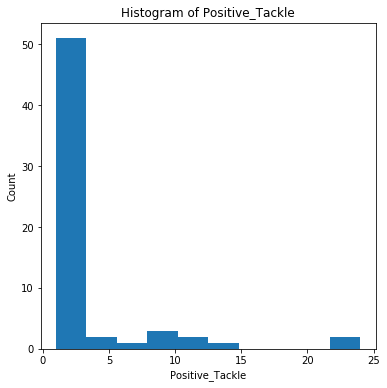

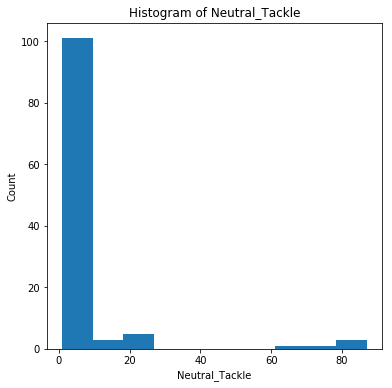

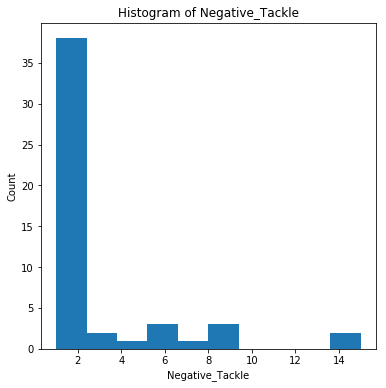

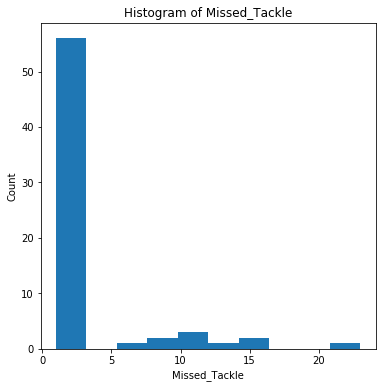

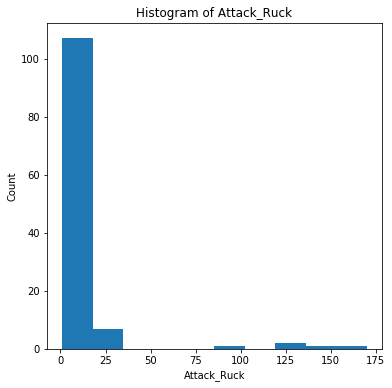

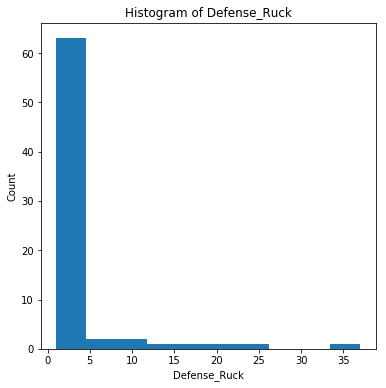

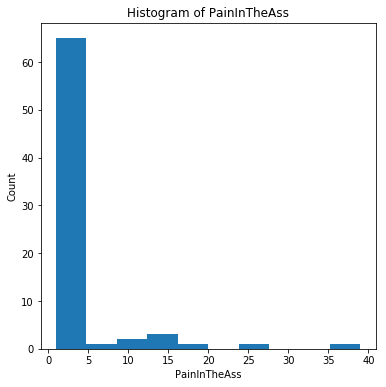

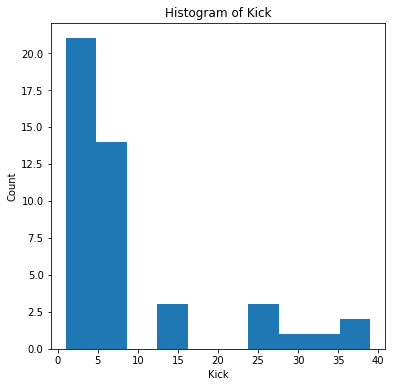

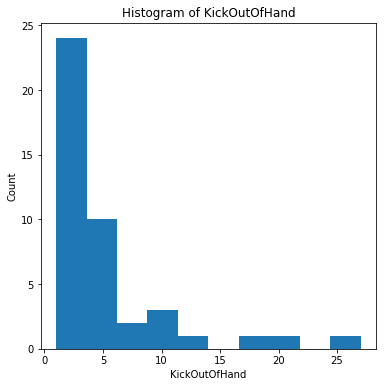

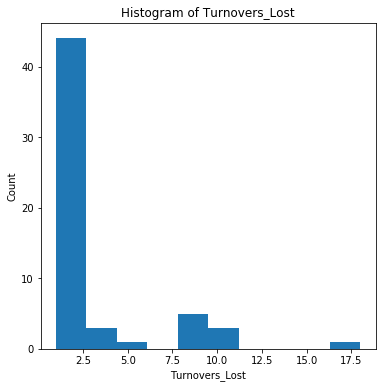

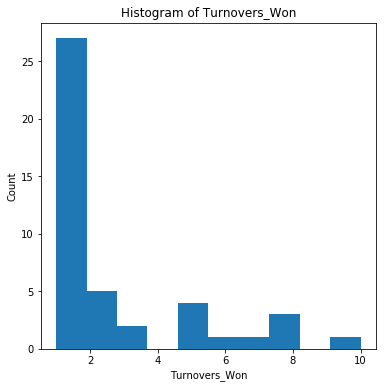

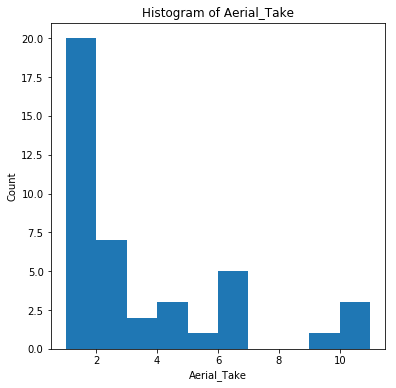

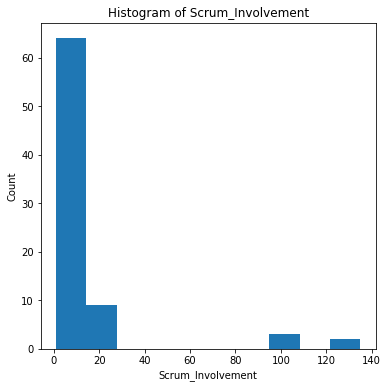

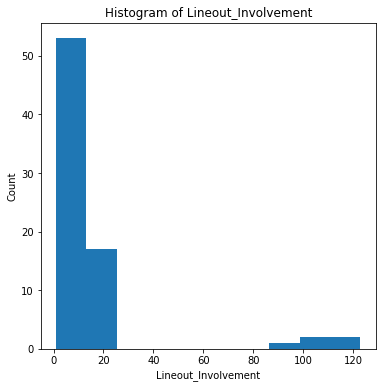

In [9]:
## Visualize Distributions w/ 1 Dimensional Plots
#Step 2- Visualize binned distributions of numerical feature variables w/ pandas histograms plot.hist

def plot_histogram(Pstats, cols, bins = 10):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        Pstats[col].plot.hist(ax = ax, bins = bins)    # Use plot.hist method from pandas on subset of data frame   
        ax.set_title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Count')   # Set y-axis label w/ matplotlib
        plt.show()
        
num_cols = ['Game', 'Games_Played', 'Minutes_Played', 'Meters', 'Involvements', 'Involve-Min', 'Meter-Involve', 
            'Positive Involvements', 'PosInvolv-Min', 'PosInvolvPct', 'Negative_Involvements', 'Live_Reload', 
            'Dead_Reload', 'Pass', 'Tips_Pass', 'Axe_Ball', 'Offload', 'Try_Assist', 'Carry', 'Gainline_Carry',
            'Linebreak', 'Defender_Beaten', 'Tackle', 'Positive_Tackle', 'Neutral_Tackle', 'Negative_Tackle',
            'Missed_Tackle', 'Attack_Ruck', 'Defense_Ruck', 'PainInTheAss', 'Kick', 'KickOutOfHand', 
            'Turnovers_Lost', 'Turnovers_Won', 'Aerial_Take', 'Scrum_Involvement', 'Lineout_Involvement']

plot_histogram(Pstats, num_cols)    

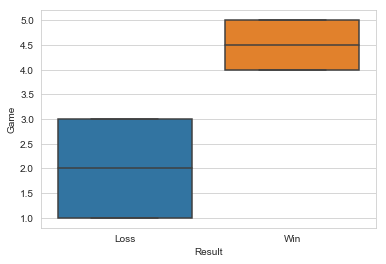

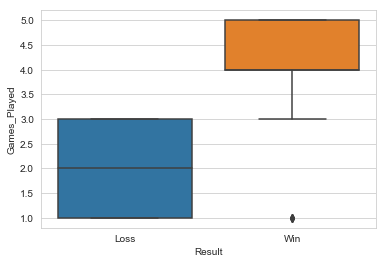

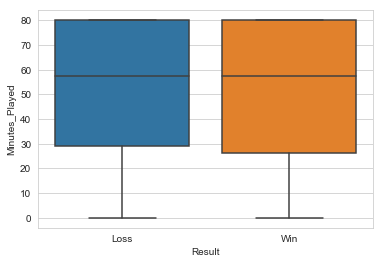

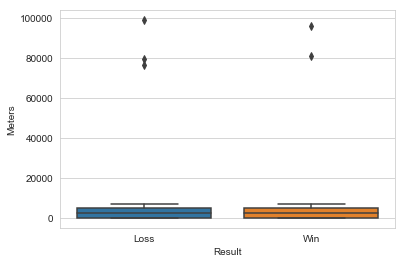

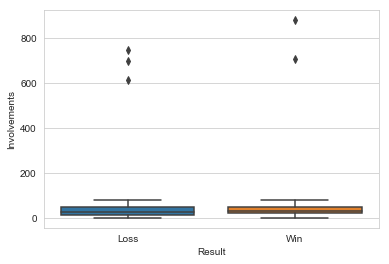

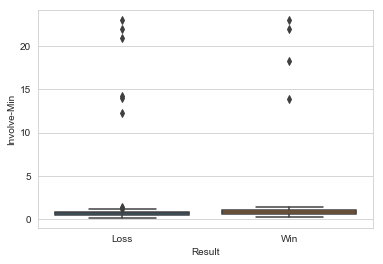

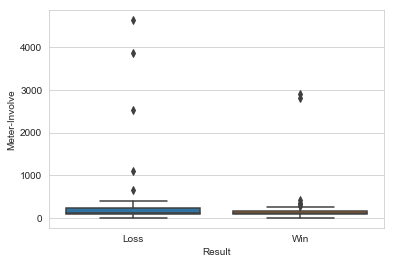

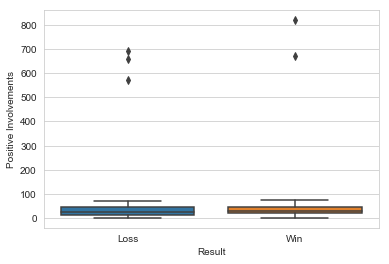

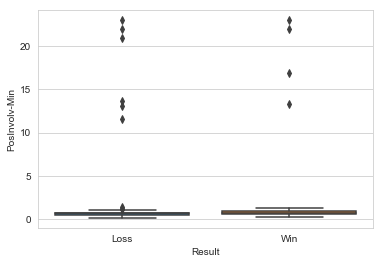

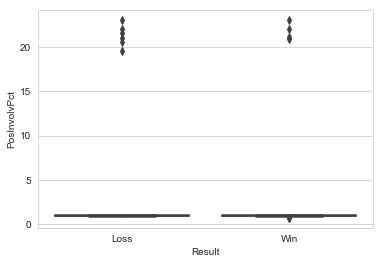

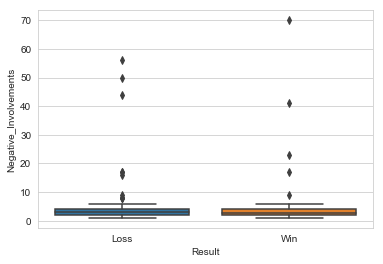

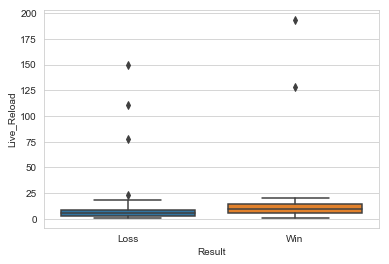

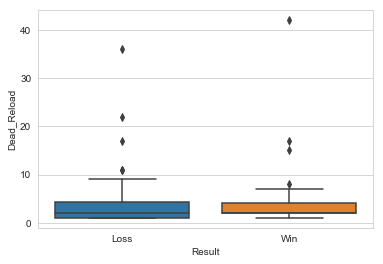

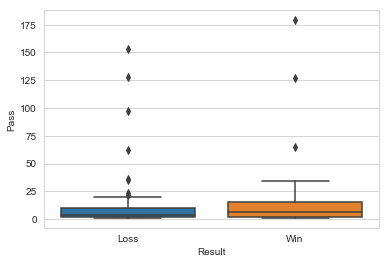

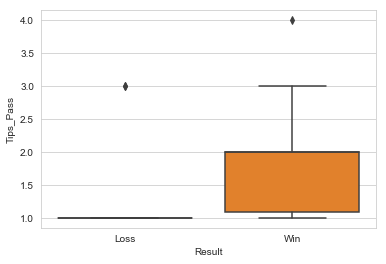

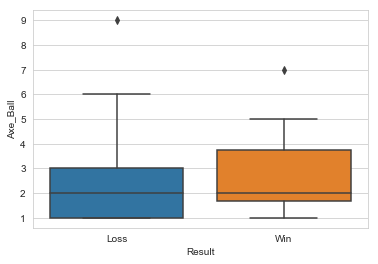

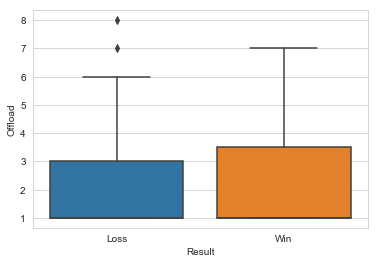

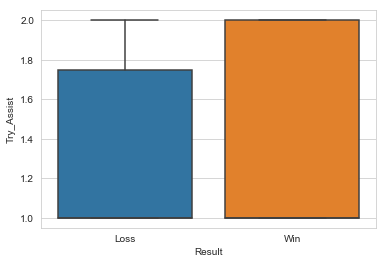

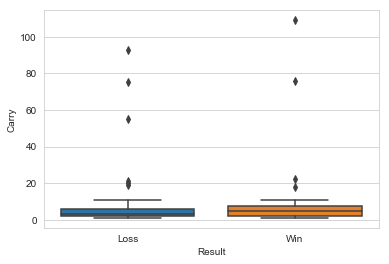

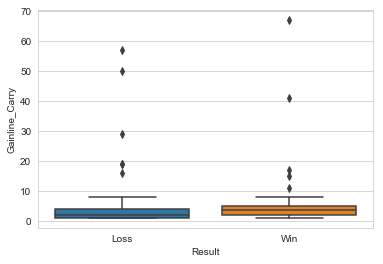

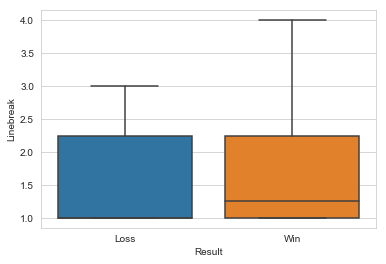

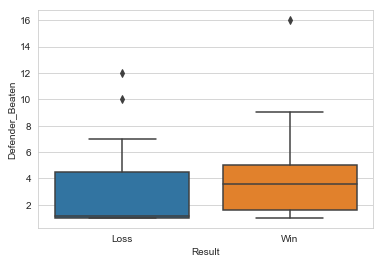

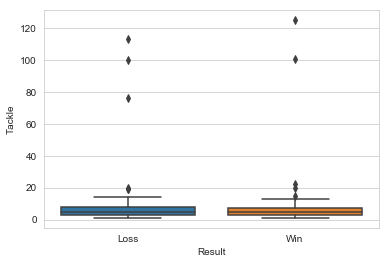

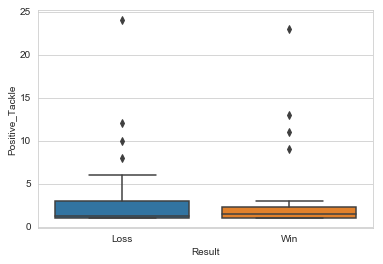

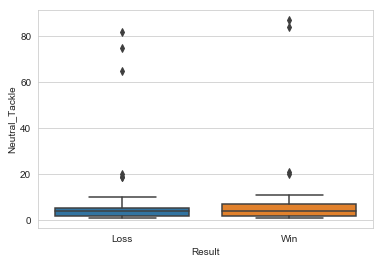

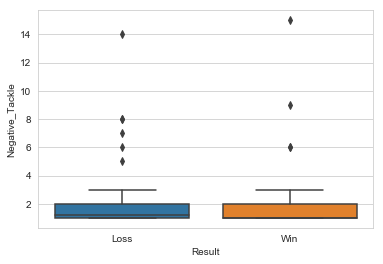

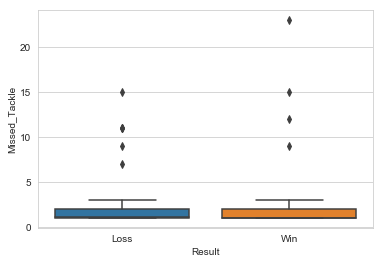

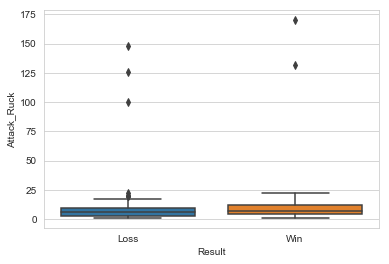

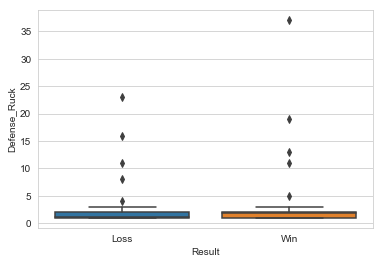

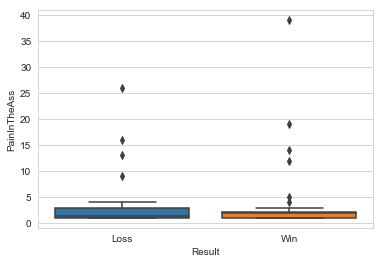

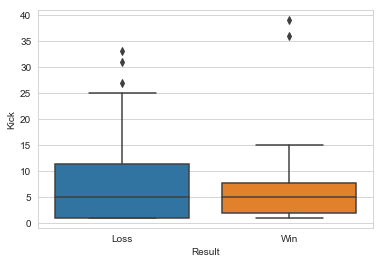

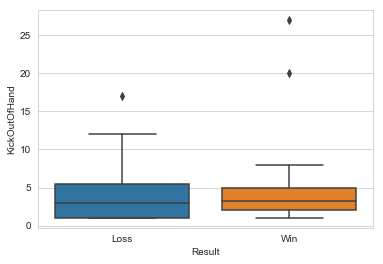

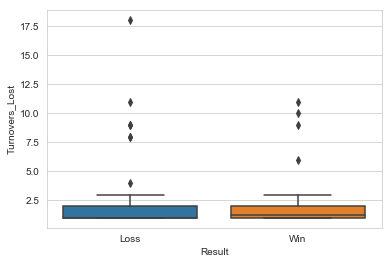

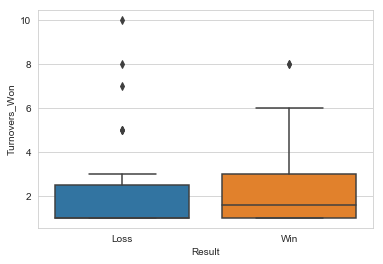

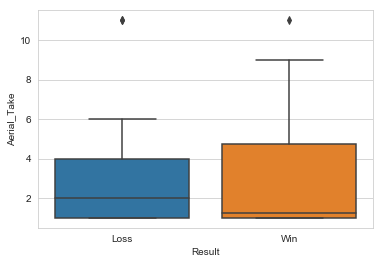

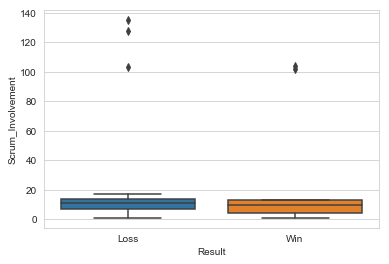

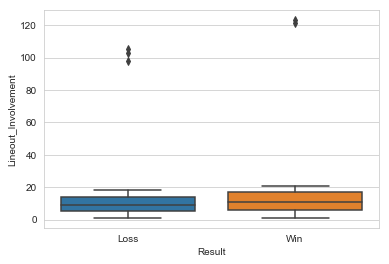

In [11]:
#Below- Visualize Class Separation by Numeric Features

def plot_box(Pstats, cols, col_x = 'Result'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data = Pstats)
        plt.xlabel(col_x)     # Label x-axis
        plt.ylabel(col)     # Label y-axis
        plt.show()
        
num_cols = ['Game', 'Games_Played', 'Minutes_Played', 'Meters', 'Involvements', 'Involve-Min', 'Meter-Involve', 
            'Positive Involvements', 'PosInvolv-Min', 'PosInvolvPct', 'Negative_Involvements', 'Live_Reload', 
            'Dead_Reload', 'Pass', 'Tips_Pass', 'Axe_Ball', 'Offload', 'Try_Assist', 'Carry', 'Gainline_Carry',
            'Linebreak', 'Defender_Beaten', 'Tackle', 'Positive_Tackle', 'Neutral_Tackle', 'Negative_Tackle',
            'Missed_Tackle', 'Attack_Ruck', 'Defense_Ruck', 'PainInTheAss', 'Kick', 'KickOutOfHand', 
            'Turnovers_Lost', 'Turnovers_Won', 'Aerial_Take', 'Scrum_Involvement', 'Lineout_Involvement']

plot_box(Pstats, num_cols)

In [12]:
#Below- Plot Categorical & Numerical Varibles w/ Seaborn boxplot
  # Shows inner two quartiles w/in the box. Length of box shows interquartile range.
  # Line w/in box shows median. Whiskers are 1.5 times the interquartile range (extreme values).
  # Outliers are just a symbol

def plot_box(Pstats, cols, col_y = 'Result'):
    for col in cols:   # Iterates over list of columns
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.boxplot(col, col_y, data = Pstats)   # Use boxplot method from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
cat_cols = ['Player', 'Unit_Position','Position_Group', 'Position', 'Result', 'Jackal', 'Conversion_Made', 'Penalty_Made',
            'Scrum_Attended', 'Scrum_Retained', 'AtkScrumPct', 'Lineout_Attended', 'Lineout_Retained', 'LineoutPct',
            'Lineout_Stolen', 'Lineout_Disrupted']

plot_box(Pstats, cat_cols)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

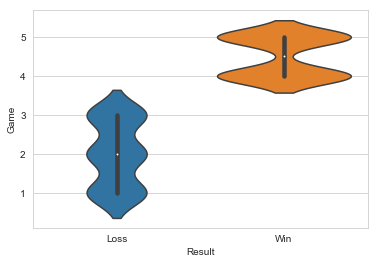

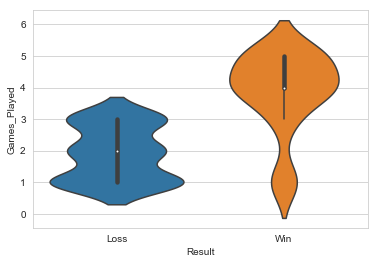

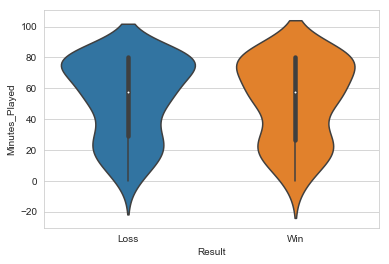

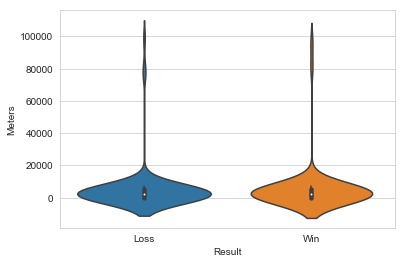

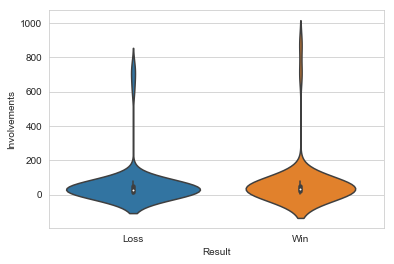

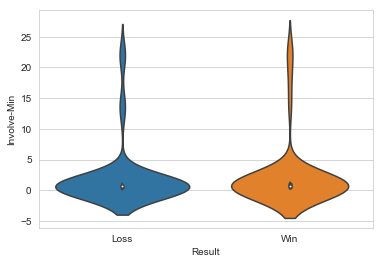

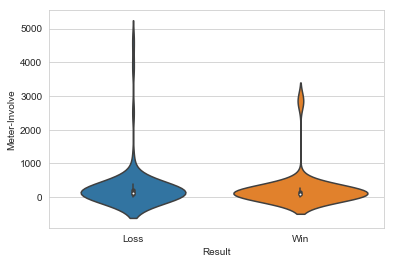

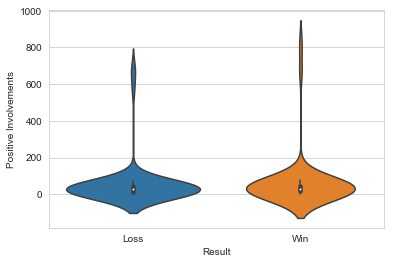

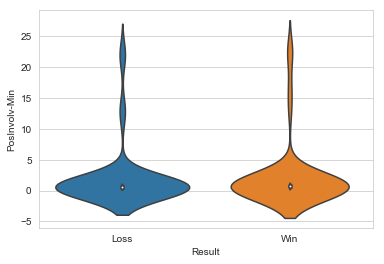

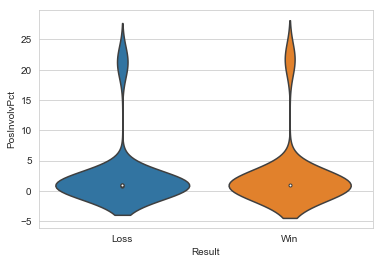

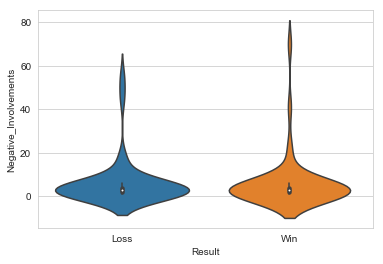

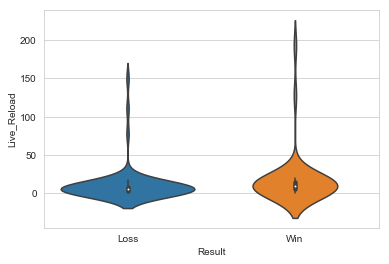

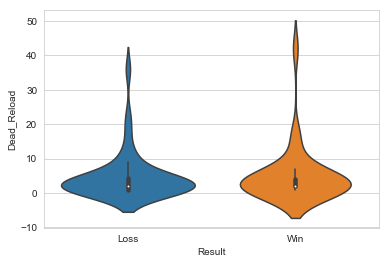

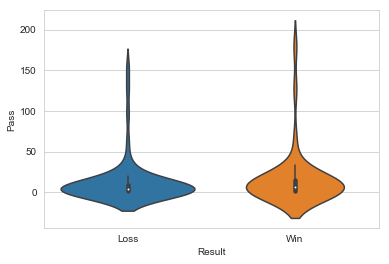

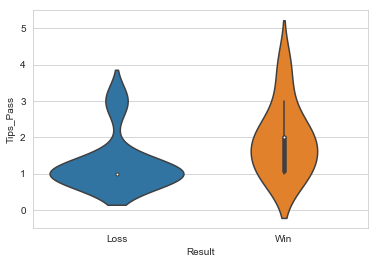

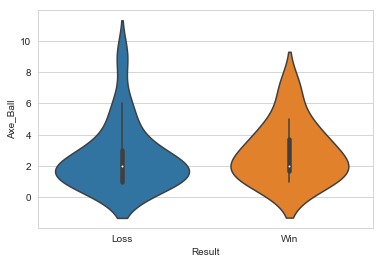

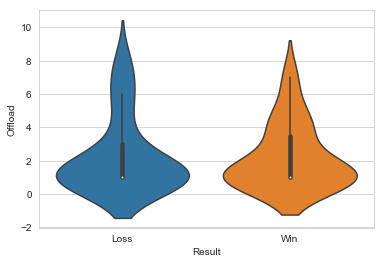

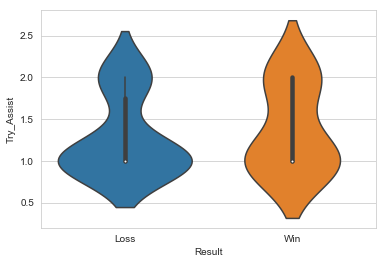

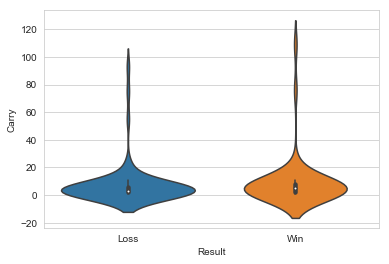

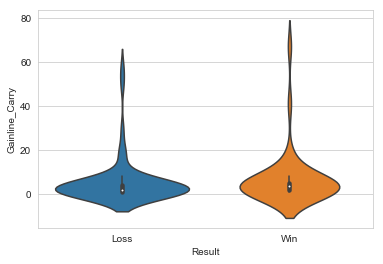

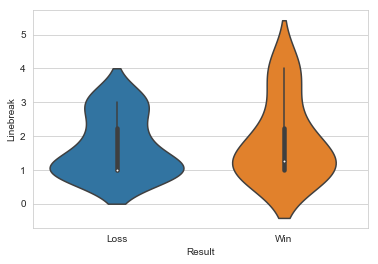

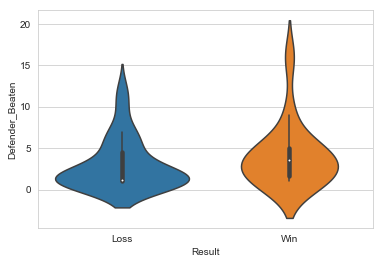

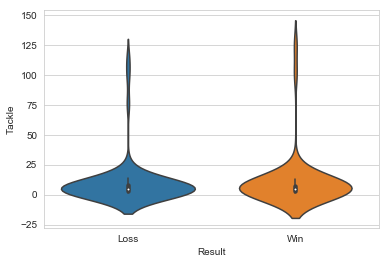

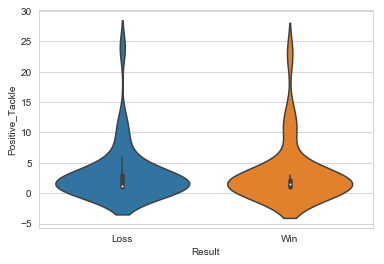

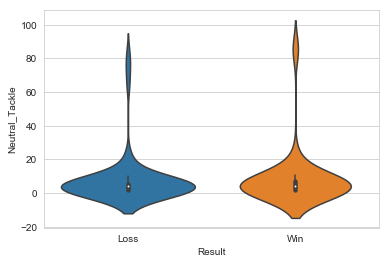

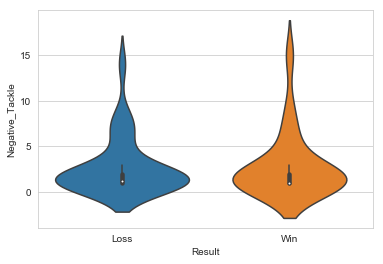

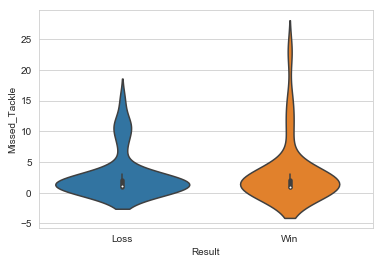

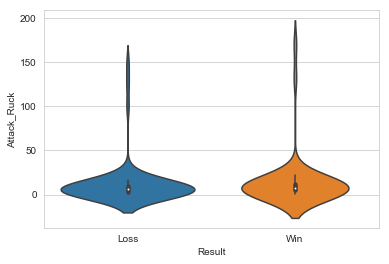

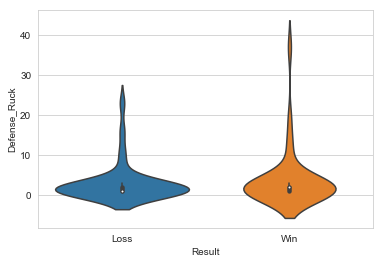

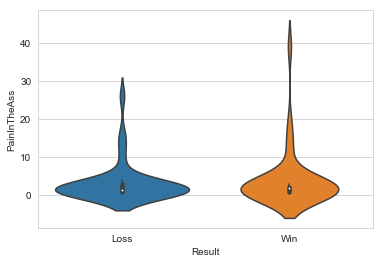

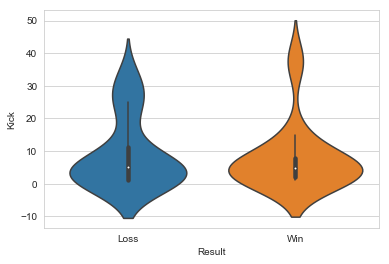

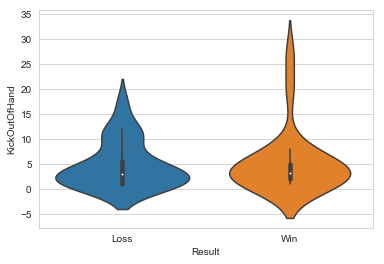

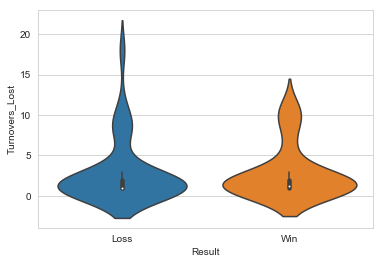

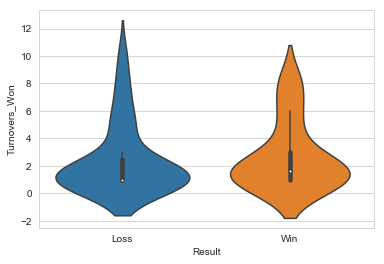

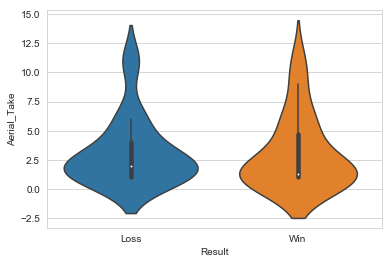

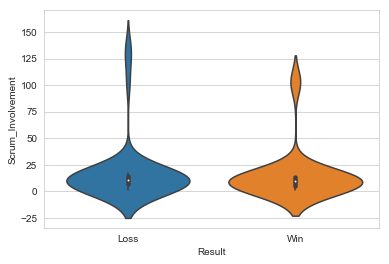

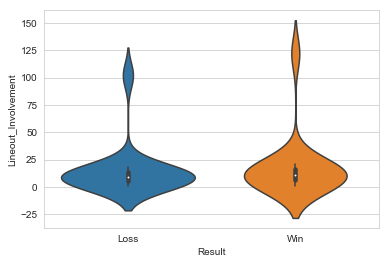

In [13]:
#Below- Violin Plot Visualizations for Numeric Feature Separation

def plot_violin(Pstats, cols, col_x = 'Result'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data = Pstats)
        plt.xlabel(col_x)     #Label x-axis
        plt.ylabel(col)     #Label y-axis
        plt.show()
        
plot_violin(Pstats, num_cols)

In [14]:
Pstats.columns

Index(['Player', 'Game', 'Unit_Position', 'Position_Group', 'Position',
       'Result', 'Games_Played', 'Minutes_Played', 'Meters', 'Involvements',
       'Involve-Min', 'Meter-Involve', 'Positive Involvements',
       'PosInvolv-Min', 'PosInvolvPct', 'Negative_Involvements', 'Live_Reload',
       'Dead_Reload', 'Pass', 'Tips_Pass', 'Axe_Ball', 'Offload', 'Try_Assist',
       'Carry', 'Gainline_Carry', 'Linebreak', 'Defender_Beaten', 'Tackle',
       'Positive_Tackle', 'Neutral_Tackle', 'Negative_Tackle', 'Missed_Tackle',
       'Attack_Ruck', 'Defense_Ruck', 'Jackal', 'PainInTheAss', 'Kick',
       'KickOutOfHand', 'Conversion_Made', 'Penalty_Made', 'Turnovers_Lost',
       'Turnovers_Won', 'Aerial_Take', 'Scrum_Involvement', 'Scrum_Attended',
       'Scrum_Retained', 'AtkScrumPct', 'Lineout_Involvement',
       'Lineout_Attended', 'Lineout_Retained', 'LineoutPct', 'Lineout_Stolen',
       'Lineout_Disrupted'],
      dtype='object')